In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
dx=pd.read_csv("linearX.csv")
dy=pd.read_csv("https://raw.githubusercontent.com/coding-blocks-archives/machine-learning-online-2018/master/Datasets/Linear%20Regression/linearY.csv")

In [2]:
dx=dx.values
dy=dy.values

In [3]:

dx=dx.reshape((-1,))
dy=dy.reshape((-1,))

In [4]:
dx=(dx-dx.mean())/dx.std()

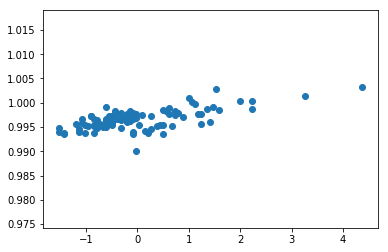

In [5]:
plt.scatter(dx,dy)

In [6]:
def error(x,y,theta):
    m=x.shape[0]
    err=0
    for i in range(m):
        err+=(theta[0]+theta[1]*x[i]-y[i])**2
    return err
    

In [7]:
def gradient(x,y,theta):
    grad=[0,0]
    m=x.shape[0]
    for i in range(m):
        grad[0]+=(theta[0]+theta[1]*x[i]-y[i])
        grad[1]+=(theta[0]+theta[1]*x[i]-y[i])*x[i]
    return grad
    

In [25]:
def gradientdescent(x,y,learning_rate=0.001):
    theta=[-2.0,0.0]
    itr=200
    error_l=[]
    theta_list=[]
    
    for i in range(itr):
        err=error(x,y,theta)
        error_l.append(err)
        grad=gradient(x,y,theta)
        theta_list.append([theta[0],theta[1]])
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
    return theta,error_l,theta_list

In [26]:
theta,elist,tlist=gradientdescent(dx,dy)
tlist=np.array(tlist)

In [27]:
print(theta)

[0.9966341387742144, 0.0013579397674630838]


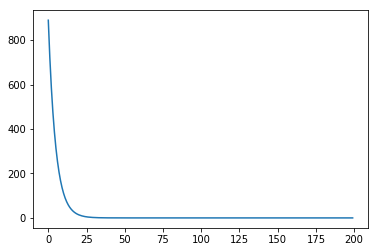

In [28]:
index=np.arange(len(elist))
plt.plot(index,elist)


In [29]:
from mpl_toolkits.mplot3d import Axes3D

In [30]:
X=dx
Y=dy
T0=np.arange(-2,3,0.01)
T1=np.arange(-2,3,0.01)
T0,T1=np.meshgrid(T0,T1)
j=np.zeros(T0.shape)
m=T0.shape[0]
n=T0.shape[1]


In [31]:
for i in range(m):
    for k in range(n):
        j[i,k]=np.sum((Y-T1[i,k]*X-T0[i,k])**2)

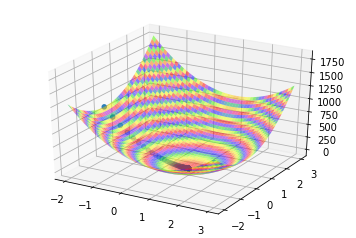

In [32]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.scatter(tlist[:,0],tlist[:,1],elist)
axes.plot_surface(T0,T1,j,cmap='prism',alpha=0.5)
plt.show()

In [16]:
axes.plot_surface?

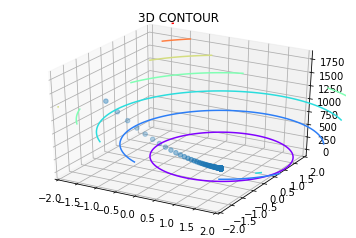

In [33]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.contour(T0,T1,j,cmap='rainbow')
axes.scatter(tlist[:,0],tlist[:,1],elist)
axes.set_ylim([-2,2])
axes.set_xlim([-2,2])
plt.title("3D CONTOUR")
plt.show()


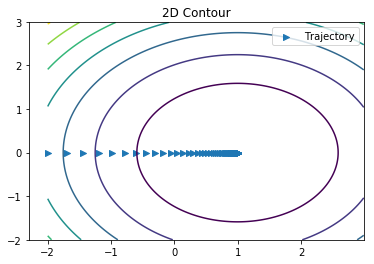

In [34]:
plt.contour(T0,T1,j)
plt.title("2D Contour")
plt.scatter(tlist[:,0],tlist[:,1],marker='>',label='Trajectory')
plt.legend()
plt.show()